# Interpreting ResNet Model With Integrated Gradients

This notebook loads the pretrained ResNet model given by [PaddlePaddle Models](https://github.com/PaddlePaddle/models/tree/release/1.7) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using Integrated Gradients algorithm, specifically the `IntGradCVInterpreter` class.

In [8]:
import paddle.fluid as fluid
from PIL import Image
import interpretdl as it
from interpretdl.data_processor.readers import read_image
from interpretdl.data_processor.visualizer import visualize_grayscale
from assets.resnet import ResNet50

If you have't done so, please first download the pretrained ResNet50 model by runnig the cell below or directly from [this link](http://paddle-imagenet-models-name.bj.bcebos.com/ResNet50_pretrained.tar). 
More pretrained models can be found [here](https://github.com/PaddlePaddle/models/tree/release/1.7/PaddleCV/image_classification).

In [11]:
# downloads and extracts the model to assets/
!wget http://paddle-imagenet-models-name.bj.bcebos.com/ResNet50_pretrained.tar -P assets/
!tar -C assets/ -xf assets/ResNet50_pretrained.tar

Define the `paddle_model` function that takes in images and return prediction probabilities. `ResNet50` is borrowed from PaddlePaddle image  classification [models](https://github.com/PaddlePaddle/models/tree/release/1.7/PaddleCV/image_classification/models).

In [4]:
def paddle_model(data):
    class_num = 1000
    model = ResNet50()
    logits = model.net(input=data, class_dim=class_num)
    probs = fluid.layers.softmax(logits, axis=-1)
    return probs

Initialize the `IntGradCVInterpreter`. 

In [5]:
MODEL_PATH = "assets/ResNet50_pretrained"
ig = it.IntGradCVInterpreter(paddle_model, MODEL_PATH, True)

Before interpreting the image, we first take a look at the original image.

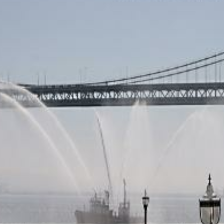

In [6]:
img_path = 'assets/fireboat.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let Integrated Gradients method help us `interpret` the image with respect to the predicted label. We choose to choose random baselines and perform 10 random trials. Gradients are overlayed with the original image.

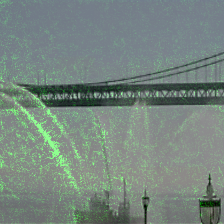

In [9]:
gradients = ig.interpret(
    img_path,
    labels=None,
    baselines='random',
    steps=50,
    num_random_trials=10,
    visual=True,
    save_path=None)

Another choice for visualization is in grayscale:

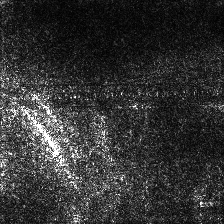

In [10]:
visualize_grayscale(gradients[0])

Note that `IntGradCVInterpreter` also supports multiple images as inputs. They can be either processed images or a list of image filepaths. Feel free to play around with it!